# Regresión logística

## Clasificación entre dos clases

Fuentes:

- http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf

Videos:

https://www.youtube.com/watch?v=-la3q9d7AKQ
https://www.youtube.com/watch?v=t1IT5hZfS48
https://www.youtube.com/watch?v=F_VG4LNjZZw
https://www.youtube.com/watch?v=HIQlmHxI6-0
https://www.youtube.com/watch?v=TTdcc21Ko9A
https://www.youtube.com/watch?v=6vO3DVJlsK4

Discusión: ¿cómo encararían un problema cuya variable a predecir es categórica y no continua?¿Aplica la regresión lineal?

Supongamos ahora que tenemos una variable de salida categórica cuyos valores pueden ser 0 o 1.


[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


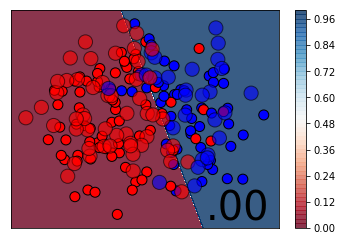

In [8]:
from helper import plot_boundaries
import numpy as np
import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline
x1=3
x2=1
x0=-2
noise=0.8
def boundary(x):
    out=np.sign([-(x[:,0]*x1+x[:,1]*x2+x0),(x[:,0]*x1+x[:,1]*x2+x0)])/2+0.5
    print(out)
    return np.array(out).transpose()

x_train=np.random.uniform(low=-2.5, high=2.5, size=[120,2])
x_test=np.random.uniform(low=-2.5, high=2.5, size=[80,2])
y_train=[np.sign(i[0]*x1+i[1]*x2+x0) for i in x_train]
y_test=[np.sign(i[0]*x1+i[1]*x2+x0) for i in x_test]
x_train=x_train+noise*np.random.normal(0,1,x_train.shape)
x_test=x_test+noise*np.random.normal(0,1,x_test.shape)

plot_boundaries(x_train,x_test,y_train,y_test,0,boundary)
plt.show()


Un criterio para modelizar el dataset anterior es plantear que de acuerdo a la posición de un patrón en particular en el plano, ese patrón tiene una probabildad P de pertenecer a la clase 1 y 1-P de pertenecer a la clase 2.

La idea es que la transición de la zona en la que los patrones pertenecen a la clase 1 y la zona en la que los patrones pertenecen a la clase 2, tenga una transición suave.


Una hipótesis para nuestro problema podría ser que un patrón en particular (x1,x2) tiene una probabilidad de ser :

$$ P(h) = \frac{1}{1 + e^{-h}} $$

A la función definida anteriormente se la llama sigmoide y tiene la siguiente forma.

<img src="800px-Funci%C3%B3n_sigmoide_01.svg.png" width=50%>

Cuando h=0, habrá una zona en la cual la probabilidad de que un patrón sea de la clase 1 es 0.5. Este valor definirá el umbral entre los patrones de tipo 1 y los patrones de tipo 2.  

Si queremos que para nuestro problema de clasificación dicho umbral sea una recta, podemos definir:

$$ h= \beta_0+\beta_1*x_1+\beta_2*x_2 $$

Nótese que cuando h=0, la probabilidad de un patrón de pertenecer a la clase 1, es 0.5. Esto ocurre en el espacio geométrico:

$$ x_2=-\frac{\beta_1}{\beta_2}.x_1-\frac{\beta_0}{\beta_2} $$

Estamos proponiendo un modelo probabilístico de parámetros $\beta_1,\beta_2,\beta_0$ y por lo tanto la pregunta es:

** ¿Cuáles son los valores de $\beta_1,\beta_2,\beta_0$ que maximizan el likelihood de este modelo?**

Para ello, podemos plantear el likelihood del modelo como la probabilidad de que este modelo haya generado los patrones observados. Si suponemos que las observaciones son independientes nos queda:

$$\mathcal{L} = \prod_{i=1}^{N} Pr(Y=y_i|X=x_i) = \prod_{i=1}^{N} p(x_i;\beta_1,\beta_2,\beta_0)^{y_i}.[1 -p(x_i;\beta_1,\beta_2,\beta_0)]^{1 - y_i} = $$
$$=\prod_{i=1}^{N} \left(\frac{1}{1 + e^{-(\beta_0+\beta_1*x_1+\beta_2*x_2)}}\right)^{y_i} . \left(1- \frac{1}{1 + e^{-(\beta_0+\beta_1*x_1+\beta_2*x_2)}}\right)^{1-y_i} $$

Queremos encontrar los parámetros $\beta_i$ que maximicen el likelihood. Como hemos visto anteriormente, maximizar el likelihood equivale a maximizar el logaritmo de éste, ya que el logaritmo es una función monótona creciente. Una forma de hacerlo es utilizar el metodo de Gradient Descent y minimizar el $-log(\mathcal{L})$. Al $-log(\mathcal{L})$ se lo denomina **cross-entropy** cost function y en general está definido como:

$$-\log(\mathcal{L})=-\sum_{i=1}^{N}\left[y_i.\log{p(x_i)}+(1-y_i)\log{(1-p(x_i))}\right]$$

Para ello debemos calcular el valor de la derivada del $-log(\mathcal{L})$. Se puede demostrar que:

$$\frac{\partial{log(\mathcal{L})}}{\partial{\beta_j}}=\sum_{i=1}^{N}(y_i-P(x_i;\beta_1,\beta_2,\beta_0)).x_{ij}=\sum_{i=1}^{N}\left(y_i-\frac{1}{1 + e^{-(\beta_0+\beta_1*x_1+\beta_2*x_2)}}\right).x_{ij}$$

Tal como en el caso del error cuadrático medio, se puede maximizar el likelihood evaluándolo para todos los datos (Batch GD), para algunos datos (MiniBatch GS) o para un solo dato (Stochastic GD).

Sklearn implementa la regresión logística. A continuación implementaremos un ejemplo para nuestros datos anteriores.

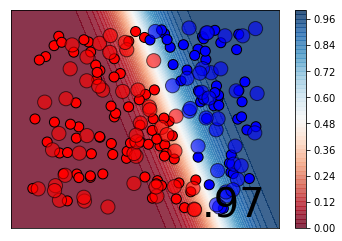

El umbral que se usó para dividir los patrones es: x2=-3.0*x1+2.0
El umbral estimado por la regresión logística es: x2=-2.9517125403117404*x1+1.7352183659612315


In [5]:
from sklearn import linear_model
clf=linear_model.LogisticRegression(tol=0.00000004)
clf.fit(x_train,y_train)
plot_boundaries(x_train,x_test,y_train,y_test,clf.score(x_test,y_test),clf.predict_proba)
plt.show()
print("El umbral que se usó para dividir los patrones es: x2={}*x1+{}".format(-x1/x2,-x0/x2))
print("El umbral estimado por la regresión logística es: x2={}*x1+{}".format(-clf.coef_[0,0]/clf.coef_[0,1],-clf.intercept_[0]/clf.coef_[0,1]))

## Regresión logística multiclase

Hasta ahora hemos clasificado los patrones de entrada en dos clases.
¿Cómo se puede adaptar lo visto anteriormente en el caso de que $y_i$ pueda pertenecer a K clases?
Para ello se define un estimador de probabilidad para cada una de las categorías.
La probabilidad de que el patrón de entrada $x^i$ pertenezca a una categoría k es:

$$P(Y=k|x_i,\beta)=\frac{e^{\beta^k.x_i}}{\sum_{j=1}^{K}{e^{\beta^j.x_i}}}$$

A esta función se la denomina función **softmax**. Esta ecuación proporciona una transición suave en cuanto a la probabilidad de pertenecer a cada clase.
Nótese que para el caso de K=2, queda la función sigmoidea de parámetro $\beta = \beta^2-\beta^1$

El procedimiento para encontrar los parámetros $\beta$ es el mismo que para la función logística. Se calcula el likelihood del modelo para un grupo de observaciones y se buscan los parámetros que maximizan dicho likelihood, es decir, minimizan la cross-entropy. Para el cálculo del gradiente de log-likelihood se puede consultar el siguiente link:

http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/

Volvamos al ejemplo de la clasificación de artículos visto anteriormente.

In [9]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
with open ('art_filt.txt', 'rb') as fp:
    itemlist = pickle.load(fp)
with open ('art_filt_test.txt', 'rb') as fp:
    itemlist_test = pickle.load(fp)
count_vect = CountVectorizer(max_df=0.9,min_df=1)
count_vect.fit(itemlist) #Aprende el vocabulario y le asigna un código a cada palabra
X_train_data=count_vect.transform(itemlist)
X_test_data=count_vect.transform(itemlist_test)

In [10]:
from sklearn import linear_model
clf=linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=100,verbose=5,C=0.01)
clf.fit(X_train_data,twenty_train["target"])

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s finished


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=5, warm_start=False)

In [9]:
clf.score(X_train_data,twenty_train["target"])

0.94564256673148317

In [17]:
clf.score(X_test_data,twenty_test["target"])

0.77602230483271373

## Ejercicio: Responder las siguientes preguntas

- ¿Qué debo modificar si el umbral que quiero definir no es una recta?  
- ¿Puedo entrenar un regresor logístico para que se comporte como una compuerta AND con un accuracy del 100%? En caso de que se pueda, entrene un regresor logístico para que se comporte como una compuerta AND de 2 entradas. Caso contrario, justifique por qué no se puede.
- ¿Puedo entrenar un regresor logístico para que se comporte como una compuerta XOR con un accuracy del 100%?  En caso de que se pueda, entrene un regresor logístico para que se comporte como una compuerta XOR de 2 entradas. Caso contrario, justifique por qué no se puede.